In [259]:
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split, GridSearchCV
from collections import Counter
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from xgboost import XGBClassifier

In [2]:
X_train = pd.read_csv("X_train.csv", index_col=0)
y_train = pd.read_csv("y_train.csv", index_col=0)
X_test = pd.read_csv("X_test.csv", index_col=0)
y_test = pd.read_csv("y_test.csv", index_col=0)

# Random Forest

In [26]:
clf = RandomForestClassifier(random_state=1, n_jobs=-1)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(metrics.classification_report(y_test, y_pred))

C:\Users\taich\AppData\Local\Temp/ipykernel_15684/3614195130.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


              precision    recall  f1-score   support

           0       0.99      0.98      0.99      2552
           1       0.70      0.80      0.75       130

    accuracy                           0.97      2682
   macro avg       0.84      0.89      0.87      2682
weighted avg       0.98      0.97      0.97      2682



<AxesSubplot:>

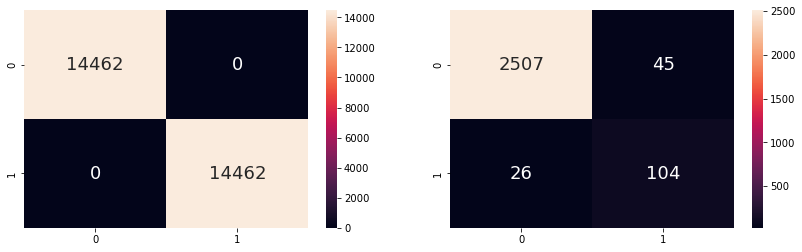

In [27]:
y_train_pred = clf.predict(X_train)
f, axes = plt.subplots(1, 2, figsize=(14, 4))
CM_train = metrics.confusion_matrix(y_train, y_train_pred)
CM_test = metrics.confusion_matrix(y_test, y_pred)
sb.heatmap(CM_train, annot = True, fmt=".0f", annot_kws={"size": 18}, ax=axes[0])
sb.heatmap(CM_test, annot = True, fmt=".0f", annot_kws={"size": 18}, ax=axes[1])

Hyperparameter tuning

In [236]:
param_grid = {
    'bootstrap': [True, False],
    'n_estimators': [200, 300, 400, 500, 600, 700, 800],
    'criterion' :['gini', 'entropy']
}
grid_search = GridSearchCV(estimator = clf, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 1, scoring='f1')

In [237]:
grid_search.fit(X_train, y_train)
grid_search.best_params_

Fitting 3 folds for each of 28 candidates, totalling 84 fits


C:\Users\taich\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:880: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


{'bootstrap': False, 'criterion': 'entropy', 'n_estimators': 800}

In [461]:
clf = RandomForestClassifier(random_state=1, n_estimators=800, bootstrap=False, criterion='entropy', n_jobs=-1)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(metrics.classification_report(y_test, y_pred))

C:\Users\taich\AppData\Local\Temp/ipykernel_15684/1135432381.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2552
           1       0.76      0.80      0.78       130

    accuracy                           0.98      2682
   macro avg       0.87      0.89      0.88      2682
weighted avg       0.98      0.98      0.98      2682



<AxesSubplot:>

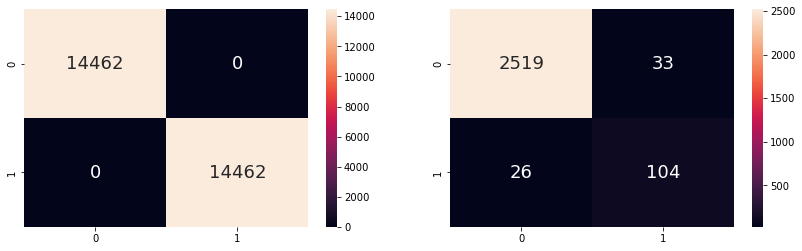

In [453]:
y_train_pred = clf.predict(X_train)
f, axes = plt.subplots(1, 2, figsize=(14, 4))
CM_train = metrics.confusion_matrix(y_train, y_train_pred)
CM_test = metrics.confusion_matrix(y_test, y_pred)
sb.heatmap(CM_train, annot = True, fmt=".0f", annot_kws={"size": 18}, ax=axes[0])
sb.heatmap(CM_test, annot = True, fmt=".0f", annot_kws={"size": 18}, ax=axes[1])

# K-Nearest Neighbours

In [428]:
neigh = KNeighborsClassifier()
neigh.fit(X_train, y_train)
y_pred = neigh.predict(X_test)
print(metrics.classification_report(y_test, y_pred))

C:\Users\taich\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


              precision    recall  f1-score   support

           0       0.98      0.80      0.88      2552
           1       0.15      0.71      0.25       130

    accuracy                           0.80      2682
   macro avg       0.57      0.75      0.57      2682
weighted avg       0.94      0.80      0.85      2682



<AxesSubplot:>

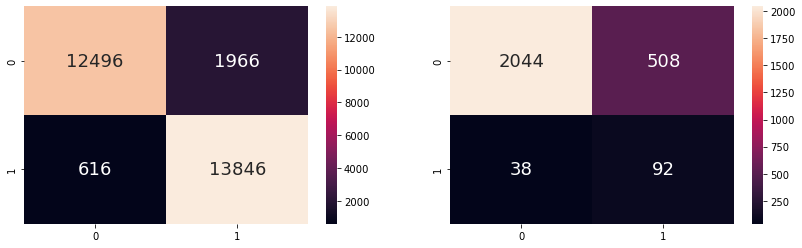

In [242]:
y_train_pred = neigh.predict(X_train)
f, axes = plt.subplots(1, 2, figsize=(14, 4))
CM_train = metrics.confusion_matrix(y_train, y_train_pred)
CM_test = metrics.confusion_matrix(y_test, y_pred)
sb.heatmap(CM_train, annot = True, fmt=".0f", annot_kws={"size": 18}, ax=axes[0])
sb.heatmap(CM_test, annot = True, fmt=".0f", annot_kws={"size": 18}, ax=axes[1])

Hyperparameter tuning

In [263]:
param_grid = {
    'n_neighbors': [3, 4, 5, 6, 7],
    'weights': ['uniform', 'distance'],
    'leaf_size': [20, 25, 30, 35, 40],
    'metric' : ['minkowski', 'euclidean', 'manhattan']
}
grid_search = GridSearchCV(estimator = neigh, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 1, scoring='f1')

In [264]:
grid_search.fit(X_train, y_train)
grid_search.best_params_

Fitting 3 folds for each of 150 candidates, totalling 450 fits


C:\Users\taich\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


{'leaf_size': 20,
 'metric': 'manhattan',
 'n_neighbors': 4,
 'weights': 'distance'}

In [447]:
neigh = KNeighborsClassifier(leaf_size=20, metric='manhattan', n_neighbors=4, weights='distance')
neigh.fit(X_train, y_train)
y_pred = neigh.predict(X_test)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.84      0.91      2552
           1       0.20      0.79      0.32       130

    accuracy                           0.83      2682
   macro avg       0.59      0.81      0.61      2682
weighted avg       0.95      0.83      0.88      2682



C:\Users\taich\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


<AxesSubplot:>

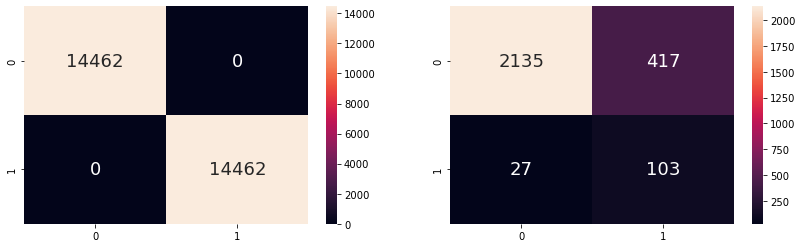

In [436]:
y_train_pred = clf.predict(X_train)
f, axes = plt.subplots(1, 2, figsize=(14, 4))
CM_train = metrics.confusion_matrix(y_train, y_train_pred)
CM_test = metrics.confusion_matrix(y_test, y_pred)
sb.heatmap(CM_train, annot = True, fmt=".0f", annot_kws={"size": 18}, ax=axes[0])
sb.heatmap(CM_test, annot = True, fmt=".0f", annot_kws={"size": 18}, ax=axes[1])

# XGBClassifier

In [332]:
xgb = XGBClassifier(random_state=1, n_jobs=-1)
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98      2552
           1       0.64      0.78      0.70       130

    accuracy                           0.97      2682
   macro avg       0.81      0.88      0.84      2682
weighted avg       0.97      0.97      0.97      2682



<AxesSubplot:>

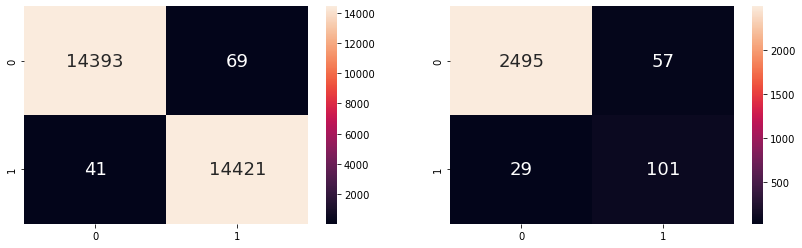

In [280]:
y_train_pred = xgb.predict(X_train)
f, axes = plt.subplots(1, 2, figsize=(14, 4))
CM_train = metrics.confusion_matrix(y_train, y_train_pred)
CM_test = metrics.confusion_matrix(y_test, y_pred)
sb.heatmap(CM_train, annot = True, fmt=".0f", annot_kws={"size": 18}, ax=axes[0])
sb.heatmap(CM_test, annot = True, fmt=".0f", annot_kws={"size": 18}, ax=axes[1])

Hyperparameter tuning

Tune max_depth and min_child_weight

In [281]:
param_grid = {
    "max_depth": [3, 5, 7, 9],
    "min_child_weight": [1, 3, 5, 7],
}
grid_search = GridSearchCV(estimator = xgb, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 1, scoring='f1')

In [282]:
grid_search.fit(X_train, y_train)
grid_search.best_params_

Fitting 3 folds for each of 16 candidates, totalling 48 fits


{'max_depth': 9, 'min_child_weight': 1}

In [285]:
xgb = XGBClassifier(random_state=1, n_jobs=-1, max_depth=9, min_child_weight=1)
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2552
           1       0.74      0.83      0.79       130

    accuracy                           0.98      2682
   macro avg       0.87      0.91      0.89      2682
weighted avg       0.98      0.98      0.98      2682



<AxesSubplot:>

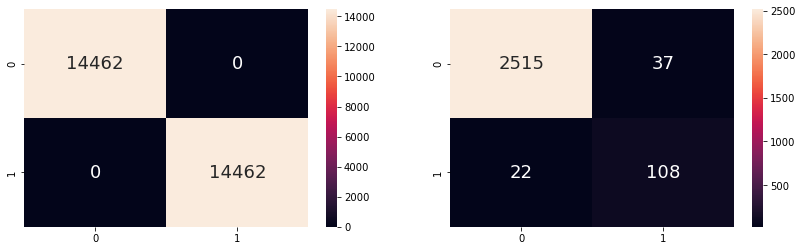

In [286]:
y_train_pred = xgb.predict(X_train)
f, axes = plt.subplots(1, 2, figsize=(14, 4))
CM_train = metrics.confusion_matrix(y_train, y_train_pred)
CM_test = metrics.confusion_matrix(y_test, y_pred)
sb.heatmap(CM_train, annot = True, fmt=".0f", annot_kws={"size": 18}, ax=axes[0])
sb.heatmap(CM_test, annot = True, fmt=".0f", annot_kws={"size": 18}, ax=axes[1])

Tune gamma

In [296]:
param_grid2 = {
    "gamma": [0, 0.1, 0.2, 0.3, 0.4]
}
grid_search = GridSearchCV(estimator = xgb, param_grid = param_grid2, cv = 3, n_jobs = -1, verbose = 1, scoring='f1')

In [297]:
grid_search.fit(X_train, y_train)
grid_search.best_params_

Fitting 3 folds for each of 5 candidates, totalling 15 fits


{'gamma': 0}

Tune subsample and colsample_bytree

In [298]:
param_grid3 = {
    "subsample": [0.6, 0.7, 0.8, 0.9],
    "colsample_bytree": [0.6, 0.7, 0.8, 0.9]
}
grid_search = GridSearchCV(estimator = xgb, param_grid = param_grid3, cv = 3, n_jobs = -1, verbose = 1, scoring='f1')

In [299]:
grid_search.fit(X_train, y_train)
grid_search.best_params_

Fitting 3 folds for each of 16 candidates, totalling 48 fits


{'colsample_bytree': 0.6, 'subsample': 0.9}

In [355]:
xgb = XGBClassifier(random_state=1, n_jobs=-1, max_depth=9, min_child_weight=1, gamma=0, colsample_bytree=0.6, subsample=0.9)
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2552
           1       0.77      0.82      0.80       130

    accuracy                           0.98      2682
   macro avg       0.88      0.91      0.89      2682
weighted avg       0.98      0.98      0.98      2682



<AxesSubplot:>

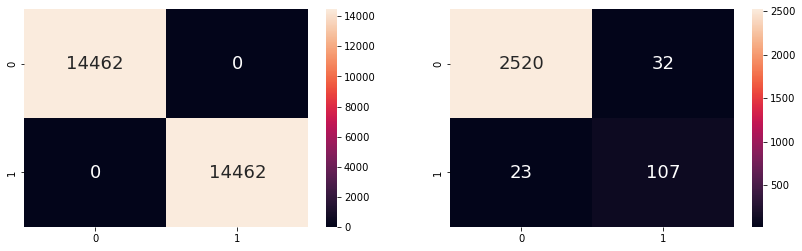

In [301]:
y_train_pred = xgb.predict(X_train)
f, axes = plt.subplots(1, 2, figsize=(14, 4))
CM_train = metrics.confusion_matrix(y_train, y_train_pred)
CM_test = metrics.confusion_matrix(y_test, y_pred)
sb.heatmap(CM_train, annot = True, fmt=".0f", annot_kws={"size": 18}, ax=axes[0])
sb.heatmap(CM_test, annot = True, fmt=".0f", annot_kws={"size": 18}, ax=axes[1])

Adjusting the learning rate and number of trees

In [399]:
xgb = XGBClassifier(random_state=1, n_jobs=-1, max_depth=9, min_child_weight=1, gamma=0, colsample_bytree=0.6, subsample=0.9, learning_rate=0.2, n_estimators=1000)
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2552
           1       0.82      0.83      0.83       130

    accuracy                           0.98      2682
   macro avg       0.91      0.91      0.91      2682
weighted avg       0.98      0.98      0.98      2682



<AxesSubplot:>

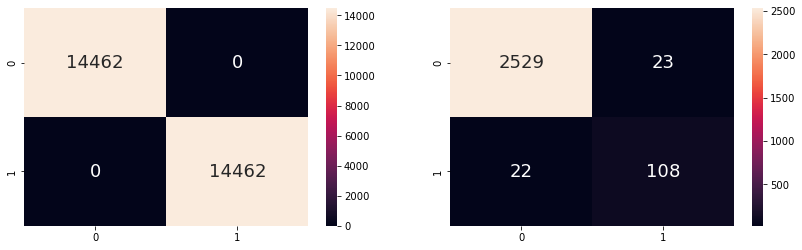

In [400]:
y_train_pred = xgb.predict(X_train)
f, axes = plt.subplots(1, 2, figsize=(14, 4))
CM_train = metrics.confusion_matrix(y_train, y_train_pred)
CM_test = metrics.confusion_matrix(y_test, y_pred)
sb.heatmap(CM_train, annot = True, fmt=".0f", annot_kws={"size": 18}, ax=axes[0])
sb.heatmap(CM_test, annot = True, fmt=".0f", annot_kws={"size": 18}, ax=axes[1])